In [30]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import utm
from mpl_toolkits.mplot3d import Axes3D



In [31]:
#read a json file to dataframe
df = pd.read_json('2021-12-15_data.json', orient='index')
index=list(df.index.values)


In [32]:
a=df.loc[index[3]]
b=pd.DataFrame(a['trail'])

In [33]:
def uuttmm(fila):
    [Easting, Northing, zone_number, zone_letter] = utm.from_latlon(fila['lat'], fila['lng'])
    return (Easting, Northing, zone_number, zone_letter)

In [34]:
c = b.apply(uuttmm, axis=1)

In [35]:
c = c.to_list()
print(c)
c=pd.DataFrame(c, columns=['Easting', 'Northing', 'Zone_N', 'Zone_L'])
e=pd.concat([b, c], axis=1)


[(554739.4499640329, 6172486.857360566, 19, 'H'), (554765.1357678501, 6172441.4603705425, 19, 'H'), (554770.1386877899, 6172465.494922666, 19, 'H'), (554750.6160984338, 6172483.020896217, 19, 'H'), (554704.5712896782, 6172497.598566612, 19, 'H'), (554580.2781915525, 6172540.250525128, 19, 'H'), (554455.250298626, 6172582.905114152, 19, 'H'), (554254.8896936805, 6172650.840242301, 19, 'H'), (553999.2422720713, 6172737.834835013, 19, 'H'), (553686.3950942275, 6172846.667703681, 19, 'H'), (553324.6317871134, 6172967.193868102, 19, 'H'), (552926.5406522419, 6173103.993128985, 19, 'H'), (552280.5759994223, 6173331.447807472, 19, 'H'), (551795.1800674829, 6173492.421664521, 19, 'H'), (551259.4243541445, 6173672.167933259, 19, 'H'), (550815.8567181055, 6173823.099481028, 19, 'H'), (550058.6875365466, 6174079.839013679, 19, 'H'), (549519.3847782676, 6174260.389636483, 19, 'H'), (549057.6198583463, 6174415.103542883, 19, 'H'), (548793.4918460422, 6174494.789373308, 19, 'H'), (548525.9225179348,

In [36]:
airport_place = {
    'Code':{
        'SCL':{
            'City': 'Santiago de Chile',
            'Latitude': -33.4379,
            'Longitude': -70.6503
    },
         'IQQ':{
            'City': 'Iquique',
            'Latitude': -20.23,
            'Longitude': -70.13
        }
}
}

(Easting, Northing, zone_number, zone_letter) = utm.from_latlon(airport_place['Code']['SCL']['Latitude'], airport_place['Code']['SCL']['Longitude'])
def plottingArea(Easting, Northing, xN):
    east_left = Easting - xN
    east_right = Easting + xN
    north_up = Northing + xN
    north_down = Northing - xN
    return (east_left, east_right, north_up, north_down)

(east_left, east_right, north_up, north_down)=plottingArea(Easting, Northing, 40000)

In [37]:
result_df=e[(e['Easting']>east_left) & (e['Easting']<east_right) & (e['Northing']>north_down) & (e['Northing']<north_up)]


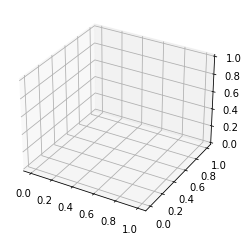

In [38]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sc= ax.plot(result_df.Easting, result_df.Northing, result_df.alt)


<AxesSubplot:xlabel='Easting', ylabel='Northing'>

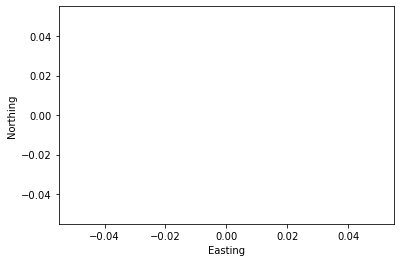

In [39]:
result_df.plot(kind='scatter', x='Easting', y='Northing', s=10, cmap='viridis')